In [1]:
import pandas as pd

<AxesSubplot:>

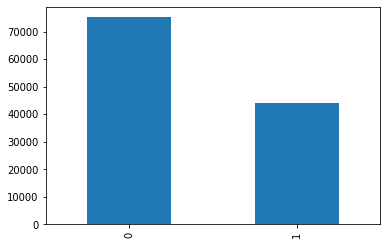

In [4]:
data = pd.read_csv('hotel_bookings.csv')
data.is_canceled.value_counts().plot(kind='bar')